# Variedad estable

Ya que tenemos una función que calcula las variedades inestables, ahora queremos encontrar las variedades estables. La manera en que calcularemos las estables es usando el mapeo inverso. 
Conocemos que el mapeo se ve como 
$$f^{-1}_{\epsilon}(x,\theta)= \left\{ \begin{array}{lcc}
             x -\theta + \epsilon sin(x) &   (mod2\pi )\\
             \\ \theta - \epsilon sin(x) & (mod2\pi)
             \end{array}
   \right.$$


Entonces lo que queremos es encontrar las variedades inestables para este mapeo, y dado que es el inverso sus variedades inestables serán las variedades estables del mapeo estándar.
Usaremos la implementación que tenemos para el mapeo estándar, ahora generalizandola para que acepte una función cualquiera.

Algunas de las funciones que anteriormente definimos no cambiarán, es el caso de EstandarMap, PolinomioTaylor1 y aquellas que no reciben como argumento al mapeo. 

In [1]:
using TaylorSeries


In [2]:
# necesitamos también definir el mapeo estandar 
"""EstandarMap(θ,p,k)
   
   Función que define el mapeo estándar.


   θ,p son las entradas del mapeo, mienrras que k es la constante del mapeo.
"""
function EstandarMap(θ,p,k)
    x_n = mod([ θ+p, p+k*sin(θ+p) ], 2*pi)
    
    
    return x_n
    
end

EstandarMap

Definimos el mapeo inverso para calcularle las variedades inestables.

In [3]:
"""
EstandarMapInv(θ,p,k) 
Es la función inversa del mapeo estándar. Recibe los mismos parámetros.

"""
function EstandarMapInv(θ,p,k)
    x_n = mod([θ-p+k*sin(θ),p-k*sin(θ)] , 2*pi )
    
    
    return x_n
    
end

EstandarMapInv

In [4]:
"""

PolinomioTaylor1(g,Cθ,CP)
   
   Es una función cuyo objetivo es recibir dos listas con valores iniciales y crear dos polinomios de grado g.
   -g : grado del polinomio
   - Cθ,CP :  Arreglo que contiene los coeficientes iniciales, es del tipo Array{TaylorSeries.TaylorN{Float64}}
   

    Esta función regresa dos arreglos que contienen elementos del tipo Taylor1.TaylorN, creados con las listas iniciales.


"""
function PolinomioTaylor1(g::Real,Cθ,CP)
    #=
    Donde L es un arreglo que contiene los coeficientes del polinomio, g es el grado del polinomio, Cθ y CP son
    arreglos que contienen los coeficientes que forman la variedad.
    
    Separamos el primer orden puesto que es diferente de los otros.
    Creamos θ,p como variables tipo TaylorN de orden 1, recordemos que aquí no es importante el orden pues sólo las
    estamos usando como variables dentro de un Taylor1 =#
    θ,p = set_variables(Float64, "θ p", order=1)
    #especificamos que Lθ,LP son de arreglos que guardarán coeficientes del polinomio, sólo son auxiliares en esta función
    Lθ = Array{TaylorSeries.TaylorN{Float64}}(1)
    LP = Array{TaylorSeries.TaylorN{Float64}}(1)
    #usamos un condicional para separar el caso 1 del resto
    if g == 1
        #tθ = Taylor1([θ], g)
        #tp = Taylor1([p], g)
        T = [Taylor1([θ], g),Taylor1([p], g)]
    #en el caso en que g>1 entonces usamos las listas que van guardando los coeficientes
    else
        #como Cθ,CP están guardando los coeficientes, necesitamos agregar el último término que será una variable 
        Lθ = push!(Cθ, θ) 
        LP = push!(CP, p)
        
        #tθ = Taylor1(Lθ, g)
        #tp = Taylor1(LP, g)
        T=[Taylor1(Lθ, g),Taylor1(LP, g)]
        
    end
    return T
end
#Esta función regresa tθ,tp que son Taylor1.TaylorN

PolinomioTaylor1

Esta función no cambio con respecto a la anterior m en el N7

In [5]:
#=Esta función toma el arreglo que contiene las lambdas que se van calculando, los coeficientes de los polinomios
y el orden de los mismos, lo que hace es generar el lado derecho de la ecuación cohomológica, multiplicando a_n*λ^n
y generando un polinomio de gradno g con estos coeficientes
=#
"""
Vecλ(λarray,g,Cθ,CP)
Es una función que calcula la parte derecha de la ecuación comohológica, es decir la parte que involucra el valor propio.
Regresa un arreglo de tipo TaylorSeries.TaylorN{Float64}


Sus argumentos son:
-g      :  grado del polinomio.
-λarray :  Arreglo que contiene el valor propio y sus potencias, hasta el grado g.
-Cθ,CP  :  Los arreglos con los polinomios que se calculan en PolinomioTaylor1.

"""



function Vecλ(λ_v,g,Cθ,CP)
    
    
    θλt=Taylor1(λ_v[1].*Cθ,g)
    pλt=Taylor1(λ_v[2].*CP,g)
    λvec=[θλt,pλt]
    
    return λvec
end

Vecλ

La siguiente función ya tiene que ver directamente con el mapeo por lo que es necesario definirlo como uno de los argumentos de la función.
Recordemos que la siguiente función recibe la mayor parte de los datos, como el grado del plinomio, los puntos fijos, el tipo de variedad a calcular y el mapeo. 
Lo que hace es crear dos arreglos que contengan como primer elemento las coordenadas del punto fijo.  También se define un arreglo para los valores propios, este contiene a su vez como primer término el valor del punto fijo.  A partir de aquí se entra en un ciclo en el que se recorre el orden del polinomio desde uno hasta el orden requerido. Para el primer término dekl polinomio se generan lo polinomios a usar mediante la función de PolinomioTaylor1, que crea dos polinomios correspondientes a $x,\theta$ , después los evalúa en el mapeo. Ya evaluados se calcula el jacobiano del sistema para obtener únicamente los coeficientes y formar el sistema en forma matricial. Al jacobiano , que contiene solo los coeficientes , se le calculan los valores y vectores propios , dependiendo de cuál variedad se quiera se escoge el primer o segundo valor propio. Con ello se tendrán los coeficientes de orden uno. Estos se agregan a las listas del inicio y se usan de nuevo para calcular los órdenes mayores como se especificó en el N7. La única diferencia de esta función es que recibe el mapeo como uno de los argumentos. 

In [6]:
#Creamos una función que reciba el orden del polinomio , el punto fijo, el parámetro k y 
#el tipo de varidad que queremos(estable=1, inestable=2)
"""
Variedades(Mapeo,orden, PuntoFijo,k,tipo_v)
Es una función que calcula las variedades de cierto mapeo. Usa las funciones de PolinomioTaylor1 y Vecλ para calcular los
polinomios de cada lado de la ecuación cohomológica y les aplica el mapeo dado. 



Argumentos:
-Mapeo : Mapeo de dos dimensiones, debe recibir al menos dos parámetros que son los polinomios antes calculados.
-orden : se trata del orden del polinomio.
-PuntoFijo : ES el punto fijo donde queremos calcular la variedad.
-k     : Es la constante del mapeo.
-tipo_v : 1 si la variedad es estable, 2 si es inestable.


"""
function Variedades(Mapeo,orden, PuntoFijo,k,tipo_v)
   
    #definimos unas listas donde se guardarán los coeficientes  de todo el polinomio, tales deben ser
    # de tipo "Array{TaylorSeries.TaylorN{Int64},1}" dado que los términos que se van agregando 
    # en cada orden son de tipo TaylorN.
    Cθ = [PuntoFijo[1]+TaylorN(0.)]
    CP = [PuntoFijo[2]+TaylorN(0.)]
    
    
    #λarrayθ,P es la lista que contiene a los coeficientes del polinomio de λ para cada caso respectivamente,
    # Hecemos una  para cada variable
    # puesto que el punto fijo puede variar en cada una y es necesaria esa información. si no se considera entonces
    # lo polinomios estarían trasladados al origen.
    λarrayθ = [PuntoFijo[1]^0]
    λarrayP = [PuntoFijo[2]^0]
    
    
   


    for g in 1:orden
        
        #Calculamos el primer término del polinomio usando las funciones anteriores
        if g == 1
        #Llamamos a la función que calcula los polinomios de grado g
            t = PolinomioTaylor1(g,Cθ,CP)
        
            #Aplicamos el mapeo a los polinomios que resultan de la función anterior.
            Or1 = Mapeo(t[1],t[2],k)
            
            #Calculamos el jacobiano del Orden 1 para obtener sus valores y vectores propios.
            JPO = jacobian(Or1)
            
            #La matriz JacFl está deinida para obtener los valores de JPO como flotantes.          
            JacFl = Array{Float64}(2,2)
            for ind in eachindex(JPO)
                #@show(ind)
                JacFl[ind] = JPO[ind].coeffs[1]
            end
            #Calculamos los valores y vectores propios
            eigval,eigvec = eig(JacFl)
            
            #escogemos el tipo de variedad que queremos calcular. Como se ordenan de menor a mayor la inestable es la segunda
            λ = eigval[tipo_v]
            #@show(λ)
            
            #Ponemos los coeficientes en una variable nueva cada uno y los agregamos a las listas CX,CP,λ
            Coefθ,CoefP = eigvec[:,tipo_v]
            push!(Cθ, Coefθ)
            push!(CP, CoefP)
            push!(λarrayθ, λ)
            push!(λarrayP, λ)
            
            λ_v=[λarrayθ,λarrayP]
            #@show(λ_v)
            
            #@show(λarray)  
            
        #Cominzan los casos en los que g>1    
        else
            #Creamos los polinomios con las listas correspondientes 
            t = PolinomioTaylor1(g,Cθ,CP)
            
            # aplicamos el mapeo estándar y al resultado le llamamos OrG por Orden g.
            OrG = Mapeo(t[1],t[2],k)
            push!(λarrayθ,λarrayθ[2]^g)
            push!(λarrayP,λarrayP[2]^g)
            λ_v=[λarrayθ,λarrayP]
            #@show(λ_v)
            
            
            #Crea los polinomios correspondientes al laso derecho de la ecuación 
            λ_vec=Vecλ(λ_v,g,Cθ,CP)
            #λvec = [λ_vec[1],λ_vec[2]]
            
            #@show(λvec)
            
            # ahora ya tengo las dos partes de la ecuación y debo igualarlas para resolver.
            EcuaCohomo=OrG-λ_vec
            
            
            # de esta ecuación necesitamos solo los de orden g, así que los extraemos manualmente 
            θ_g=EcuaCohomo[1].coeffs[g+1]
            p_g=EcuaCohomo[2].coeffs[g+1]
            vec_orden_g=[θ_g,p_g]
            
            #calculamos el jacobiano
            JacOrdenG = jacobian(vec_orden_g)
            
            #calculamos el término independiene en la ecuación
            θ_ind=EcuaCohomo[1].coeffs[g+1].coeffs[1].coeffs[1]
            p_ind=EcuaCohomo[2].coeffs[g+1].coeffs[1].coeffs[1]
            vec_ind=[-θ_ind,-p_ind]
            
            
            #Con esta información podemos evaluar lo siguiente:
            # Si el vector de términos independientes es cero y el determinante del jacobiano es distinto de cero
            # entonces la solución a la ecuación cohomológica es la trivial
            if norm(vec_ind)==0.
                if det(JacOrdenG)!=0.
                    Coefθ,CoefP=[0.,0.]
                    Cθ[g+1]=Coefθ
                    CP[g+1]=CoefP
                end
            else
                # Si el vector de términos independientes es distinto de ceroentonces necesitamos 
                #resolver la ecuación JacOrdenG[x_g,p_g]*[x,p]**=vec_ind[x_g,p_g]
                # entonces solo se trata de invertir el jacobiano y multiplicar con el vector del lado izquierdo
                TermG=JacOrdenG \ vec_ind
                Coefθ=TermG[1]
                CoefP=TermG[2]
                Cθ[g+1]=Coefθ
                CP[g+1]=CoefP
            
            end
            
        end
    end
    #@show(Cθ)
    #@show(CP)
    #@show(λarrayθ)
    #@show(λarrayP)
    return Cθ,CP,λarrayθ, λarrayP
end
            
        

Variedades

Las siguientes funciones tampoco cambian puesto que la manera de graficar es la misma. En general se debe crear una función que pueda graficar cualquier mapeo pero en este caso solo se grafica el estpandar.-

In [7]:
using PyPlot

In [8]:
#esta es una función para evaluar el los polinomios que calculamos
# recibe como entrada el tiempo que es el valor del parámetro t, el paso
# que define en pasos de cuanto queremos ir evaluando y claro los polinomios A,B
"""
evaluar(Tiempo, paso,A,B)


Esta función evalúa en los polinomios calculados el valor del parámetro t haasta un cierto punto. Regresa la gráfica 
de los polinomios.


Argumentos:


-Tiempo: Valor hasta el cual se quiere evaluar los polinomios. 
-paso  : Se trata de el ancho de los pasos en los que se evalua cada polinomio, es decir un paso de 0.1 quiere decir que
evaluará en 0,0.1,0.2,0.3... Tiempo.
-A,B   : Son los polinomios que representan a x,p en el mapeo
"""
function evaluar(Tiempo, paso,A,B,PuntoFijo)
    ValX = Float64[]
    ValY = Float64[]
    
    push!(ValX, PuntoFijo[1]) 
    push!(ValY, PuntoFijo[2])
    for t = 1:paso:Tiempo
        
        x = mod(Float64(evaluate(A,t)),2*pi)
        y = mod(Float64(evaluate(B,t)),2*pi)
        #=
        x = mod2pi(evaluate(A,t))
        y = mod2pi(evaluate(B,t))
        =#
        push!(ValX,x)
        push!(ValY,y)
        
    end
    p = plot(ValX,ValY,linestyle="-",marker=",")
    #@show(ValX,ValY)
    
    title("Espacio Fase")
    legend(loc="upper right",fancybox="true")
    
    #p = plot(ValX,ValY,color="red",linestyle="-",marker=",")
    #p = plot(ValX,ValY,linestyle="-",marker=",")
    
end

evaluar

In [9]:
"""
iterarMap(f,x_i,p_i,n, k)

Es una función que itera el mapeo estándar, es decir hace un barrido del espacio fase del mismo. 
Regresa las listas que contienen la información de todos los puntos del espacio fase.


Argumentos:
-f    : Función o mapeo a iterar
-x_i ,p_i : Punto inicial de donde se comienza a calcular.
-n    : punto hasta donde queremos iretar.
-k    : ϵ, el valor de la constante del mapeo. 

"""
function iterarMap(f,x_i,p_i,n, k)   #Definimos una función para iterar el mapeo
    
    x = x_i                      #    
                                     #Damos condiciones iniciales
    y = p_i                          #

    iteradosMX = [x_i]

    iteradosMY = [p_i]               #Definimos dos listas que tendran los valores de cada par ordenado de theta y P, y agregamos las condiciones iniciales

    for i=0:n              #iniciamos un ciclo de iteraciones donde se calculan x_n, y_n y se agregan a lalista correspodiente            

        F = f(x_i,p_i, k)
        
        push!(iteradosMX,F[1])
        
        push!(iteradosMY,F[2])
            

        x_i = F[1]

        p_i = F[2]
    end

    return iteradosMX, iteradosMY  #La funcion iterados regresa las listas que corresponden a la trayectoria del 
end

iterarMap

In [10]:
#esta función llama la función que itera el mapeo para crear su gráfica.
"""
graficarMap(k)
Es una función que grafica el mapeo usando la función iterarMap.



Argumentos
-k : ϵ, es decir el valor de la constante del mapeo.

"""
function graficarMap(k)
    n = 50
    s=2pi/14

    for p_i=0:s:2pi
        for x_i =0:s:2pi
            t,p = iterarMap(EstandarMap,x_i,p_i,n, k)
            p = scatter(t,p,marker=".",s=0.1)
        end
    end
    
end

graficarMap

In [11]:
#esta función solo llama a las anteriores para que todo sea más compacto, y grafica tamto el mapeo como la variedad
"""
Graficar(Tiempo, paso, k,A,B)

Es una función que grafica tanto las variedades como el espacio fase del mapeo estándar. Llama a las funciones graficarMap
y evaluar, que ya definimos antes.



Argumentos:
-Tiempo : Valor del parámetro t, recibe el valor final de este. 
-paso   : paso es la cantidad en la que se va modificando el valor de Tiempo. Es decir si paso = 0.1, los valores de
tiempo serán 0.0,0.1,0.2...
-k      : es el valor de la constante del mapeo (ϵ)
A,B,C,D : son los arreglos donde están los coeficientes de las variedades.

"""
function Graficar(Tiempo, paso, k,A,B,PuntoFijo)
    graficarMap(k)
    evaluar(Tiempo,paso,A,B,PuntoFijo)
    #evaluar(Tiempo,paso,C,D)
end

Graficar

La función que definimos ahora como PolinomioCohomo es necesaria para calcular el error de las variedades calculadas. Ya que el error se define como :
 $$|f \circ P - P \circ \lambda |_ {inf}=E $$
 

La siguiente función también deberá cambiar para recibir el mapeo como uno de sus argumentos. Lo que hace es evaluar la ecuación de cohomología como una resta de dos composiciones. 

In [12]:

"""
PolinomioCohomo(Mapeo,Pol_vec,λvec, k)
Esta función calcula la ecuación cohomológica con los polinomios que ya se calcularon. Regresa un arreglo de dos 
elementos que son los valores de x,θ del mapeo.


Argumentos:
-Mapeo : función o mapeo del cual calculamos las variedades.Debe ser una función que reciba tres parámetros
 que son dos de sus variables y la constante del mapeo. Como salida debe tener un arreglo de dos elementos. 
-Pol_vec : Es un arreglo de dos elementos que son los polinomios calculados con anterioridad. 
-k     : es el valor de la constante del mapeo (ϵ)

"""
function PolinomioCohomo(Mapeo,Pol_vec,λvec, k,PuntoFijo)
    Map_vec=Mapeo(Pol_vec[1],Pol_vec[2],k)
   #=
    @show(Pol_vec)
    @show(Map_vec)
    @show(λvec)
    
    @show(PuntoFijo) 
    =#
    Ec_Cohomo = mod(Map_vec-λvec,2*pi)#-[PuntoFijo[1]^2, PuntoFijo[2]^2]
    @show(Ec_Cohomo)
    return Ec_Cohomo
end

PolinomioCohomo

Hay una pequeña modificación en la ecuación cohomológica ya que cuando calculamos las variedades que no están asociadas al punto fijo [0,0] hay una traslación del polinomio por lo que al momento de calcular el error resultaba constante. Es decir el polinomio correspondiente a $\theta$ en la ecuación cohomologica,
$$ 6.283185307179586+ at+bt^{2}+O(3)$$


In [13]:
"""
Err(Ec_Cohomo,Tiempo,paso)
La función evalúa el error definido a partir de la ecuación cohomológica. Regresa dos arreglos que contienen el error para
cada valor del parámetro t.



Argumentos:

-Ec_cohomo : Es un arreglo que contiene el remanente de la ecuación cohomológica, proviene de la función PolinomioCohomo
-Tiempo    : Es el valor del parámetro t hasta el cual se quiere evaluar.
-λvec      : Es el lado derecho de la ecuación cohomológica, se trata de un arreglo de dos elementos.
-k         : Es el valor de la constante del mapeo (ϵ)

"""
function Err(Ec_Cohomo,Tiempo,paso,PuntoFijo)
    Val=Float64[]
    Tiem=Float64[]
    E1=Ec_Cohomo[1]
    E2=Ec_Cohomo[2]
    for t = 0:paso:Tiempo
        x = evaluate(E1,t)
        y = evaluate(E2,t)
        E=[x,y]
        
        norma = norm(E,Inf)
        
        push!(Val,norma)
        push!(Tiem,t)
        
    end
    return Tiem,Val
end

Err

Hay una pequeña corrección en la forma en la que se define el error. Si recordamos la manera en la que se calcula es que se toma la norma infinito de la siguiente expresión:
$$E = f\circ P - P \circ \lambda$$
    Pero cuando se toma un punto diferente al cero lo que ocasiona un pequeño corrimiento de 2*pi a lo más. Lo que nos dará un error constante al final puesto que la norma infinito toma el valor mayor del vector E. Lo que arregla de manera un poco ingénua esto es restarle la norma del punto fijo que escogerá entre cero y $2\pi$ para el caso del mapeo estándar. 

Dado que la función de ErrorE es la que calcula el error en general también debe recibir como uno de sus argumentos el mapeo. 

In [14]:
"""
ErrorE(Pol_vec,λvec,k,T,paso)
Es una función que calcula el error, junta las funciones de PolinomioCohomo y Err para dar una lista con los valores del error
para cada valor de t en el polinomio. 



Argumentos:
-Pol_vec : Es un arreglo de dos elementos que contiene a los polinomios calculados.
-λvec : Es un arreglo de dos elementos que contiene la parte derecha de la ecuación cohomológica. 
-k    : Es el valor de la constante del mapeo (ϵ)
-T    : Es el valor hasta el cual queremos evaluar el parámetro t en las variedades.
-paso : Es la cantidad en la que va variando el parámetro t.

"""
function ErrorE(Mapeo,Pol_vec,λvec,k,T,paso,PuntoFijo)
    EcuaCohomo = PolinomioCohomo(Mapeo,Pol_vec,λvec,k,PuntoFijo)
    #EcuaCohomoI = PolinomioCohomo(Pol_vecI,λvecI,k)
    #@show(EcuaCohomo)
    Tiempo,valor=Err(EcuaCohomo,T,paso,PuntoFijo)
    #TiempoI,valorI=Err(EcuaCohomoI,T,paso)
    return Tiempo, valor #,TiempoI, valorI
end

ErrorE

Queremos juntar todas las funciones que ya definimos antes ahora en una función que recibe sólo los datos iniciales
y calcula las variedades además de graficarla.


In [15]:
"""
    CalculoVariedad(k,Tiempo,paso,Pol_vec,λvec)

La función grafica las variedades calculadas y calcula el error.


Argumentos:
- k : constante del mapeo
-Tiempo : Valor del parámetro t hasta el cual se quiere calcular.
-paso : Es la cantidad en la que va variando el parámetro t.
-Pol_vec, Pol_vecI :  Arreglo de polinomios estable o inestable, parte izquierda de la ecuación cohomológica.
-λvec, λvecI : Parte derecha de la ecuación cohomológica, estable o inestable.
"""

function CalculoVariedad(Mapeo,k,Tiempo,paso,Pol_vec,λvec,PuntoFijo)
    B = Pol_vec[2]
    A = Pol_vec[1]
    
    Graficar(Tiempo,paso,k,A,B,PuntoFijo)
    x1,y1=ErrorE(Mapeo,Pol_vec,λvec, k,Tiempo,paso,PuntoFijo)
    
    

    return A,B,x1,y1
end

CalculoVariedad

In [16]:

"""
MetParametrización(Mapeo,orden,PuntoFijo,k,tipo_v,Tiempo,paso)
Es la función que daso un mapeo, un punto fijo y un orden calcula la variedad inestable o estable de tal mapeo. Regresa
tanto la gráfica de la variedad junto con el mapeo y el error para tal variedad. 


Argumentos:
-Mapeo : Es la función a la que queremos calcularle una variedad. Debe ser una función que reciba tres parámetros, 
         estos parámetros deben ser las dos variables del mismo además de la constante que define al mapeo. Debe regresar
        un arreglo de dos elementos.
-orden : Es el orden de la variedad que se quiere calcular. Es preferible que sea un número impar. 
-PuntoFijo : Es el punto fijo al rededor del cual se quiere calcular la variedad.
-k     : Es el valor de la constante del mapeo (ϵ)
-tipo_v : Es  el tipo de variedad que se quiere calcular, 2 si es inestable, 1 si es estable.
-Tiempo : Es el valor del parámetro t hasta el cual se quiere calcular.
-paso  : Es la cantidad en la que va variando el parámetro t.


"""
function MetParametrización(Mapeo, orden, PuntoFijo, k, tipo_v, Tiempo, paso)
    CoeficientesX,CoeficientesP,λarrayθ,λarrayP = Variedades(Mapeo,orden,PuntoFijo,k,tipo_v)
    X = Float64[]
    P = Float64[]
    #@show(λarrayθ)
    #@show(λarrayP)
    
    for i in 1:orden+1
            
        push!(X,CoeficientesX[i].coeffs[1].coeffs[1])
        push!(P,CoeficientesP[i].coeffs[1].coeffs[1])
    end
    TaylorX = Taylor1(X, orden) 
    TaylorP = Taylor1(P, orden)
    Taylor = [-TaylorX,-TaylorP]
    #λarrayθ[1]=1.0
    #λarrayP[1]=1.0
    λx_pol=Taylor1(X.*λarrayθ,orden)
    λp_pol=Taylor1(P.*λarrayP,orden)
    λ_vec=[-λx_pol,-λp_pol]
    
    
    #@show(λ_vec)
    #@show(Taylor)
    
    
    VariedadX, VariedadP,ErrorT,ErrorX=CalculoVariedad(Mapeo,k,Tiempo,paso,Taylor,λ_vec,PuntoFijo)
    
    return TaylorX,TaylorP,ErrorT, ErrorX, λ_vec;
end

MetParametrización

Variedad inestable del mapeo estándar inverso , calculada con un polinomio de orden 55 y con un punto fijo [0,0] para $\epsilon=0.3$ en el mapeo y evaluando hasta un valor de 4.9 en el parámetro. 

Ec_Cohomo = TaylorSeries.Taylor1{Float64}[ 1.6653345369377348e-16 t + 3.0814879110195774e-33 t² - 2.168404344971009e-19 t³ - 4.453712996395483e-34 t⁴ + 1.8465318250143747e-19 t⁵ + 2.1441016958998524e-35 t⁶ + 2.461027758467768e-20 t⁷ + 1.0983525340495749e-36 t⁸ - 6.671728628123014e-23 t⁹ + 9.201055757254238e-38 t¹⁰ - 3.078299335240674e-24 t¹¹ + 1.189695669979141e-38 t¹² + 4.2481264151418795e-25 t¹³ - 2.1244367852165585e-40 t¹⁴ + 2.9048559454391663e-26 t¹⁵ + 2.19815792055293e-41 t¹⁶ - 3.7042782845485083e-29 t¹⁷ + 1.5742951246675964e-43 t¹⁸ - 7.298696334086115e-30 t¹⁹ + 7.213604660639874e-45 t²⁰ - 5.754269775364062e-31 t²¹ + 1.8423203530773442e-46 t²² - 1.0314896894797779e-32 t²³ + 1.0088957005107198e-48 t²⁴ - 7.836637568139538e-35 t²⁵ - 1.3610154031520398e-49 t²⁶ - 1.0637598503219458e-35 t²⁷ + 8.199213034495026e-51 t²⁸ - 1.5634247417542634e-37 t²⁹ - 6.368214850025036e-52 t³⁰ + 6.269537281437276e-39 t³¹ + 4.588198341226033e-54 t³² - 4.938445063960785e-42 t³³ - 6.8541509877425875e-56 t³⁴ +

/home/evelyn/.julia/v0.5/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


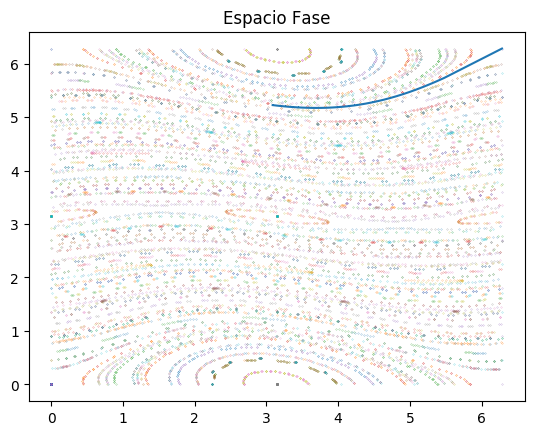

In [17]:
X1,P1,ErrorT_1,ErrorX_1,λ1 = MetParametrización(EstandarMapInv,51, [2*pi,2*pi], 0.3, 2, 4.9, 0.125)



Variedad inestable del mapeo estándar inverso , es decir la variedad estable del mapeo estándar. El orden del polinomio es de 55 y se evalúo hasta un valor del parámetro de t igual a 3.9

Variedad estable del mapeo estándar inverso, con las mismas condiciones que el caso anterior. 

Ec_Cohomo = TaylorSeries.Taylor1{Float64}[ 2.220446049250313e-16 t + 1.232595164407831e-32 t² - 2.8888949165808538e-34 t⁶ + 8.131516293641283e-20 t⁷ + 1.2037062152420224e-35 t⁸ - 5.082197683525802e-21 t⁹ + 7.52316384526264e-37 t¹⁰ + 2.350988701644575e-38 t¹² - 6.617444900424222e-24 t¹³ + 4.1359030627651384e-25 t¹⁵ - 1.9387045606711586e-26 t¹⁷ - 1.4349296274686127e-41 t¹⁸ + 8.077935669463161e-28 t¹⁹ + 5.3809861030072976e-43 t²⁰ - 1.262177448353619e-29 t²¹ - 1.6815581571897805e-44 t²² + 7.888609052210118e-31 t²³ + 8.758115402030107e-46 t²⁴ - 2.465190328815662e-32 t²⁵ - 2.7369110631344083e-47 t²⁶ + 1.925929944387236e-33 t²⁷ + 6.842277657836021e-49 t²⁸ - 3.611118645726067e-35 t²⁹ - 1.0691058840368783e-50 t³⁰ + 1.0022867662845734e-51 t³² - 3.5264830524668625e-38 t³³ - 2.088097429759528e-53 t³⁴ + 1.1020259538958945e-39 t³⁵ + 1.631326116999631e-54 t³⁶ - 1.1479437019748901e-41 t³⁷ - 3.0587364693743084e-56 t³⁸ + 1.4349296274686127e-42 t³⁹ + 3.1861838222649046e-58 t⁴⁰ - 3.363116314379561e-44 t⁴¹

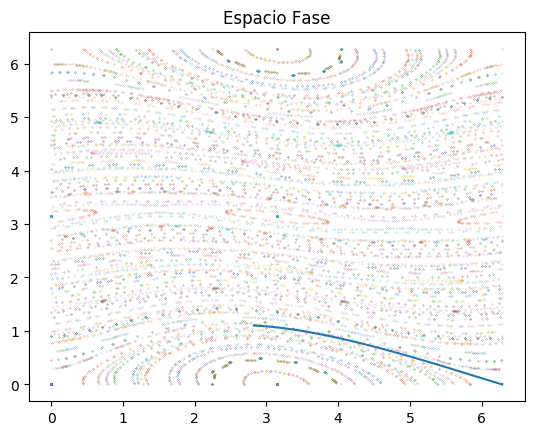

( 6.283185307179586 + 0.9226754120168447 t + 3.15932865628746e-17 t² - 0.013237296611941757 t³ - 1.0960657033718348e-18 t⁴ + 0.0002641486520857086 t⁵ + 3.2276441267717354e-20 t⁶ - 5.05757940890364e-6 t⁷ - 7.886147176643098e-22 t⁸ + 8.880082384472433e-8 t⁹ + 1.6575767187236965e-23 t¹⁰ - 1.434148811808909e-9 t¹¹ - 3.0953040065090513e-25 t¹² + 2.1561015390530303e-11 t¹³ + 5.263446571087592e-27 t¹⁴ - 3.0530262905900765e-13 t¹⁵ - 8.299814146023888e-29 t¹⁶ + 4.110981745436714e-15 t¹⁷ + 1.2299796747938402e-30 t¹⁸ - 5.30366753834708e-17 t¹⁹ - 1.730137014263827e-32 t²⁰ + 6.594268599692111e-19 t²¹ + 2.3275701968748934e-34 t²² - 7.938213125432188e-21 t²³ - 3.0124502346931867e-36 t²⁴ + 9.286505990429276e-23 t²⁵ + 3.768424660774807e-38 t²⁶ - 1.0589250984993198e-24 t²⁷ - 4.573649510263917e-40 t²⁸ + 1.179900124565216e-26 t²⁹ + 5.402287119761672e-42 t³⁰ - 1.287364767072478e-28 t³¹ - 6.226287977257724e-44 t³² + 1.3778646816748796e-30 t³³ + 7.017264905693836e-46 t³⁴ - 1.4488485627544028e-32 t³⁵ - 7.7482

In [18]:
X3,P3,ErrorT_3,ErrorX_3,λ3 = MetParametrización(EstandarMapInv,51, [2*pi,0.0], 0.3, 1, 4.9, 0.125)

Variedad inestable del mapeo estándar con un polinomio de orden 55 y evaluando hasta 3.9.

Ec_Cohomo = TaylorSeries.Taylor1{Float64}[ - 1.2037062152420224e-35 t²⁷ - 3.76158192263132e-37 t²⁹ + 5.877471754111438e-39 t³¹ + 1.044048714879764e-53 t⁴⁹ - 3.2626522339992623e-55 t⁵¹ + 𝒪(t⁵²), - 2.7755575615628914e-17 t³ - 3.469446951953614e-18 t⁵ + 1.6940658945086007e-21 t¹³ + 2.6469779601696886e-23 t¹⁷ - 1.6543612251060553e-24 t¹⁹ + 5.169878828456423e-26 t²¹ - 9.693522803355793e-27 t²³ - 1.262177448353619e-28 t²⁷ + 6.310887241768095e-30 t²⁹ - 1.9721522630525295e-31 t³¹ - 1.5407439555097887e-33 t³⁵ - 9.027796614315168e-36 t³⁹ + 7.52316384526264e-37 t⁴¹ - 5.877471754111438e-38 t⁴³ + 2.938735877055719e-39 t⁴⁵ - 2.7550648847397363e-40 t⁴⁷ - 3.587324068671532e-43 t⁵¹ + 𝒪(t⁵²)]

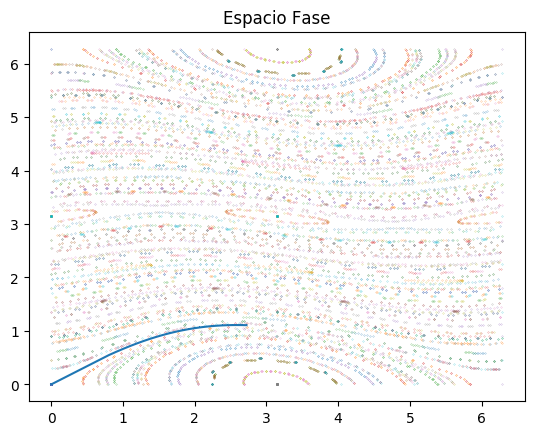

In [19]:
X2,P2,ErrorT_2,ErrorX_2 ,λ2= MetParametrización(EstandarMap,51, [0.0,0.0], 0.3, 2, 3.9, 0.125)

Variedad estable del mapeo estándar con las mismas condiciones que el caso anterior.

Ec_Cohomo = TaylorSeries.Taylor1{Float64}[ - 1.5407439555097887e-33 t² - 8.673617379884035e-19 t³ + 7.222237291452134e-35 t⁴ + 2.371692252312041e-20 t⁵ + 1.316553672920962e-36 t⁶ + 3.705769144237564e-22 t⁷ + 6.171345341817009e-38 t⁸ + 2.1713491079516976e-24 t⁹ + 5.395335399281984e-40 t¹⁰ + 9.128067306493372e-26 t¹¹ + 1.999933168284379e-41 t¹² + 1.4799030581946181e-27 t¹³ - 8.081988892993382e-43 t¹⁴ + 3.92088521798131e-29 t¹⁵ + 5.1234975101876124e-45 t¹⁶ + 2.833042948193624e-31 t¹⁷ - 1.936043845402383e-46 t¹⁸ - 3.556575707847913e-33 t¹⁹ + 1.1283660890934537e-48 t²⁰ + 1.7511927091375028e-35 t²¹ + 2.855995259553594e-50 t²² - 1.512588018907214e-36 t²³ - 3.03215095156133e-52 t²⁴ + 1.1620306751770547e-38 t²⁵ - 6.302953642914435e-54 t²⁶ - 4.915921417044097e-41 t²⁷ - 9.71299892722213e-57 t²⁸ + 1.9266495692351154e-42 t²⁹ - 6.010017538997035e-58 t³⁰ - 8.777736167766894e-45 t³¹ - 8.423138324553687e-61 t³² - 1.922072594309605e-46 t³³ - 2.7098779729419034e-62 t³⁴ + 2.6126177161584192e-50 t³⁵ + 6.23

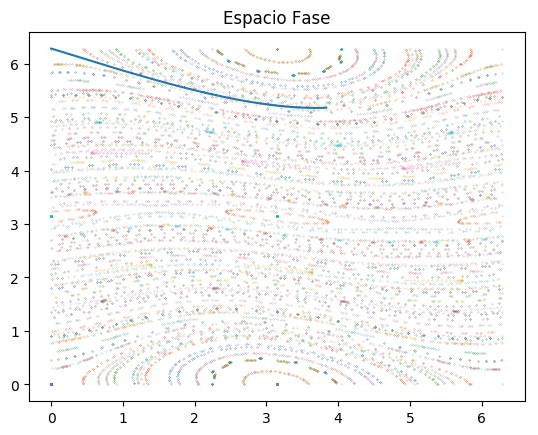

In [20]:
X4,P4,ErrorT_4,ErrorX_4 ,λ4= MetParametrización(EstandarMap,51, [0.0,2*pi], 0.3, 1, 5.9, 0.125)

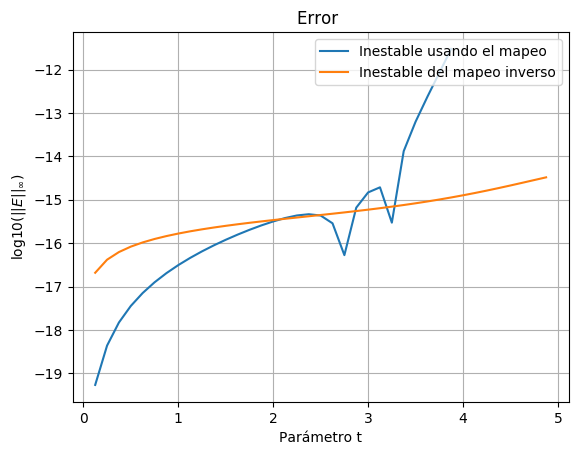

PyObject <matplotlib.legend.Legend object at 0x7fe6c524c610>

In [21]:
plot(ErrorT_2,log10(ErrorX_2),  marker= "None", label="Inestable usando el mapeo")
plot(ErrorT_1,log10(ErrorX_1), marker= "None", label="Inestable del mapeo inverso")
#@show(ErrorX_1)
#plot(ErrorT_3,log10(ErrorX_3))
#plot(ErrorT_4,log10(ErrorX_4))
xlabel("Parámetro t")
ylabel(L"log10($|| E||_{\infty})$")
title("Error ")
grid("on")
legend(loc="upper right",fancybox="true" )

Quiero ver si es posible ver el cruce de las dos variedades, para ellos sólo necesitamos graficar ambas variedades en una sóla gráfica.

Ec_Cohomo = TaylorSeries.Taylor1{Float64}[ - 2.7910435283817248 t + 0.09159932972484332 t³ - 0.004181351981045697 t⁵ + 0.00018314133350495447 t⁷ - 7.355902934843604e-6 t⁹ + 2.717618845488979e-7 t¹¹ - 9.346281789530018e-9 t¹³ + 3.027439957023928e-10 t¹⁵ - 9.325365785005174e-12 t¹⁷ + 2.75214906620587e-13 t¹⁹ - 7.827762256832415e-15 t²¹ + 2.1556045010114808e-16 t²³ - 5.7686475234218105e-18 t²⁵ + 1.5047426664714048e-19 t²⁷ - 3.835461021794713e-21 t²⁹ + 9.573026889779049e-23 t³¹ - 2.34384863182179e-24 t³³ + 5.637951302734442e-26 t³⁵ - 1.334132719685667e-27 t³⁷ + 3.1093152150357567e-29 t³⁹ - 7.144313571731227e-31 t⁴¹ + 1.6198623860725307e-32 t⁴³ - 3.6271623659939417e-34 t⁴⁵ + 8.026762745071737e-36 t⁴⁷ - 1.7566317121547643e-37 t⁴⁹ + 3.8040255226583046e-39 t⁵¹ + 𝒪(t⁵²), - 2.0036645679391407 t + 0.3727865260664608 t³ - 0.058378331177955364 t⁵ + 0.007903260344647755 t⁷ - 0.0009511527842804881 t⁹ + 0.00010423387931705153 t¹¹ - 1.059737568266848e-5 t¹³ + 1.0136296015641712e-6 t¹⁵ - 9.2160855625743

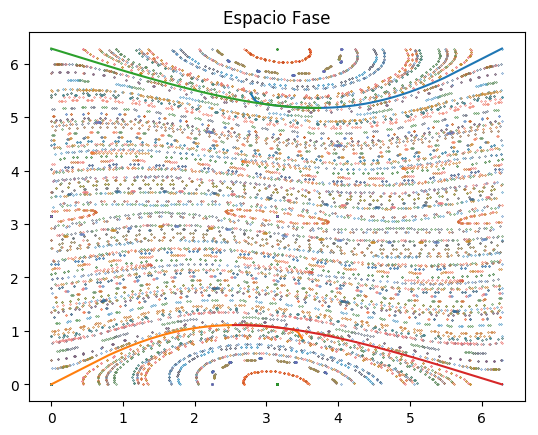

In [22]:
CalculoVariedad(EstandarMap,0.3,5.7,0.125,[X2,P2],λ2,[2*pi,2*pi])
CalculoVariedad(EstandarMapInv,0.3,5.7,0.125,[X1,P1],λ1,[0.0,0.0])
CalculoVariedad(EstandarMapInv,0.3,5.7,0.125,[X3,P3],λ3,[0.0,2*pi])
CalculoVariedad(EstandarMap,0.3,5.7,0.125,[X4,P4],λ4,[2*pi,0.0])

legend(loc="upper right",fancybox="true")


Queremos observar si hay un cruce entre las variedades,que se observa en el caso de k= 1,5

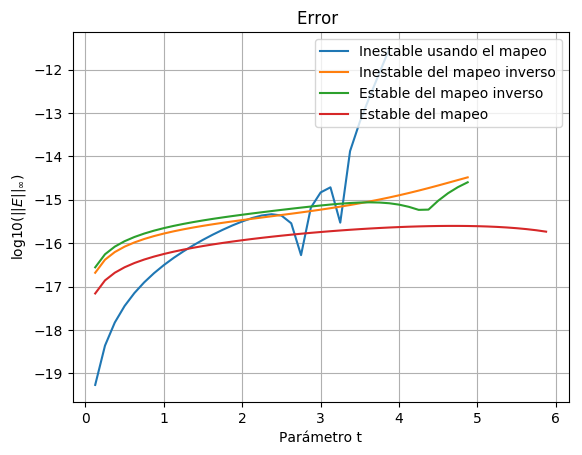

PyObject <matplotlib.legend.Legend object at 0x7fe6c4508750>

In [23]:
plot(ErrorT_2,log10(ErrorX_2),  marker= "None", label="Inestable usando el mapeo")
plot(ErrorT_1,log10(ErrorX_1), marker= "None", label="Inestable del mapeo inverso")
plot(ErrorT_3,log10(ErrorX_3), marker= "None", label="Estable del mapeo inverso")
plot(ErrorT_4,log10(ErrorX_4), marker= "None", label="Estable del mapeo")
#@show(ErrorX_1)
#@show(ErrorX_1)

#plot(ErrorT_3,log10(ErrorX_3))
#plot(ErrorT_4,log10(ErrorX_4))
xlabel("Parámetro t")
ylabel(L"log10($|| E||_{\infty})$")
title("Error ")
grid("on")
legend(loc="upper right",fancybox="true" )

Ec_Cohomo = TaylorSeries.Taylor1{Float64}[ 2.220446049250313e-16 t - 1.2924697071141057e-26 t¹¹ - 3.009265538105056e-36 t¹⁹ - 1.1754943508222875e-38 t²¹ - 1.3684555315672042e-48 t²⁹ + 6.077163357286271e-64 t⁴¹ - 9.055679078826712e-72 t⁴⁷ - 1.7686873200833423e-74 t⁴⁹ + 6.747006683667535e-80 t⁵³ - 2.635549485807631e-82 t⁵⁵ + 𝒪(t⁶⁸), - 2.7755575615628914e-17 t⁵ - 2.6020852139652106e-18 t⁷ + 5.421010862427522e-20 t⁹ + 1.0164395367051604e-20 t¹¹ - 4.235164736271502e-22 t¹³ + 1.2924697071141057e-26 t¹⁹ + 4.0389678347315804e-28 t²¹ + 2.524354896707238e-29 t²³ + 7.703719777548943e-34 t²⁹ + 2.407412430484045e-35 t³¹ - 2.350988701644575e-38 t³⁵ - 1.1479437019748901e-41 t³⁹ + 1.7516230804060213e-46 t⁴⁵ - 2.7369110631344083e-48 t⁴⁷ - 8.552847072295026e-50 t⁴⁹ + 2.6727647100921956e-51 t⁵¹ - 9.956824444577827e-60 t⁶¹ - 3.111507638930571e-61 t⁶³ - 4.861730685829017e-63 t⁶⁵ + 𝒪(t⁶⁸)]
Ec_Cohomo = TaylorSeries.Taylor1{Float64}[ - 2.465190328815662e-32 t² + 6.162975822039155e-33 t⁴ - 8.673617379884035e-1

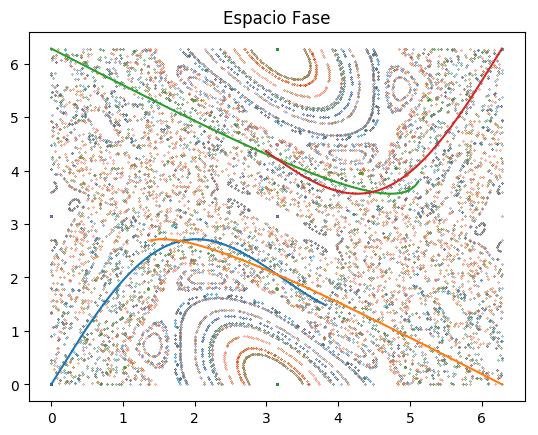

TaylorSeries.Taylor1{Float64}[ 1.942890293094024e-16 t + 5.103714352626175e-33 t² + 3.283099703557668e-18 t³ - 1.9611947749119045e-34 t⁴ - 1.7712418456597982e-20 t⁵ - 6.005897955769878e-37 t⁶ - 2.3156664773964504e-22 t⁷ - 4.1909114868909416e-39 t⁸ + 8.232946344301024e-25 t⁹ + 3.6011483197766473e-41 t¹⁰ + 1.7132541079551516e-26 t¹¹ + 2.663566437225421e-42 t¹² + 2.4099667480589998e-29 t¹³ - 7.833813789974334e-45 t¹⁴ + 2.2122382263286214e-31 t¹⁵ - 1.8294404549259082e-47 t¹⁶ + 5.412554843320527e-35 t¹⁷ - 1.70264839632646e-49 t¹⁸ + 1.2035052466658676e-35 t¹⁹ + 6.68159501792902e-52 t²⁰ - 3.526476039814705e-38 t²¹ - 5.220242391364371e-54 t²² + 9.183549384054792e-41 t²³ + 1.0195788189627901e-56 t²⁴ - 1.7936620336061057e-43 t²⁵ - 3.9827297776921136e-59 t²⁶ + 2.1019476964850192e-45 t²⁷ + 2.333630729197487e-61 t²⁸ - 2.7369110631343442e-48 t²⁹ - 6.0771633572862584e-64 t³⁰ + 1.0691058840368781e-50 t³¹ - 3.732610706897927e-83 t³² - 4.176194859519056e-53 t³³ - 9.273015376718553e-69 t³⁴ + 8.1566305849

( 6.283185307179586 + 0.4159735579192842 t + 4.709011896248532e-18 t² - 0.0006231824155013111 t³ - 1.1698066671314492e-20 t⁴ + 7.28214392874998e-7 t⁵ + 1.700868798175778e-23 t⁶ - 6.076352369799008e-10 t⁷ - 1.6706409557198726e-26 t⁸ + 4.00406874495164e-13 t⁹ + 1.2615245807174848e-29 t¹⁰ - 2.227197541182013e-16 t¹¹ - 7.888338745874336e-33 t¹² + 1.0888009435799607e-19 t¹³ + 4.272078104654428e-36 t¹⁴ - 4.801681289534146e-23 t¹⁵ - 2.063276350344708e-39 t¹⁶ + 1.9449407548109856e-26 t¹⁷ + 9.068804075263406e-43 t¹⁸ - 7.330981315447188e-30 t¹⁹ - 3.6815062032783446e-46 t²⁰ + 2.596845696135809e-33 t²¹ + 1.3958096079017859e-49 t²² - 8.711698836548632e-37 t²³ - 4.984924782023287e-53 t²⁴ + 2.7844809421031347e-40 t²⁵ + 1.6902705177115872e-56 t²⁶ - 8.547920632381473e-44 t²⁷ - 5.445138368128517e-60 t²⁸ + 2.5179581780836584e-47 t²⁹ + 1.580062472894431e-63 t³⁰ - 6.41463530422127e-51 t³¹ - 4.7477838728798996e-67 t³² - 4.176194859519056e-54 t³³ - 9.273015376718554e-70 t³⁴ + 3.622271631530685e-72 t³⁶ - 7.07

In [28]:
X5,P5,ErrorT_5,ErrorX_5 ,λ5= MetParametrización(EstandarMap,67, [0.0,0.0], 1.5, 2, 10.9, 0.125)
X6,P6,ErrorT_6,ErrorX_6 ,λ6= MetParametrización(EstandarMapInv,67, [2*pi,0.0], 1.5, 1, 8.9, 0.125)
X7,P5,ErrorT_7,ErrorX_7 ,λ7= MetParametrización(EstandarMap,67, [0.0,2*pi], 1.5, 1, 10.9, 0.125)
X8,P6,ErrorT_8,ErrorX_8 ,λ8= MetParametrización(EstandarMapInv,67, [2*pi,2*pi], 1.5, 2, 8.9, 0.125)

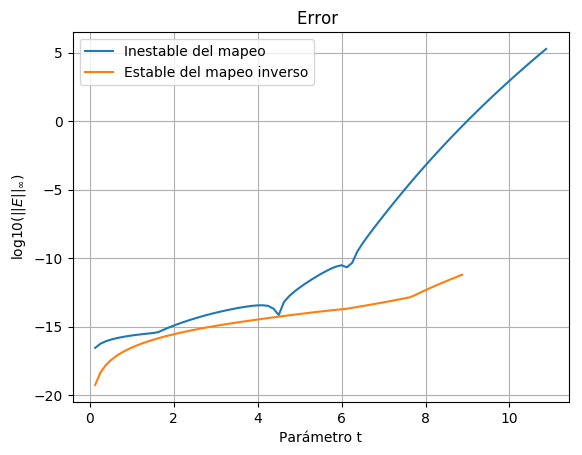

PyObject <matplotlib.legend.Legend object at 0x7fe6c44d2f10>

In [29]:

plot(ErrorT_5,log10(ErrorX_5), marker= "None", label="Inestable del mapeo")
plot(ErrorT_6,log10(ErrorX_6), marker= "None", label="Estable del mapeo inverso")

xlabel("Parámetro t")
ylabel(L"log10($|| E||_{\infty})$")
title("Error ")
grid("on")
legend(loc="upper left",fancybox="true" )

IterativSolvers (power iteration) calcula para BigFloat
Eigen.jl ln38
eigFact  181
trefethem numerical linear algebra